In [3]:
from langchain import hub
from langchain_community.chat_models import ChatOllama
from langgraph.graph import END, StateGraph
from typing import Dict, TypedDict
from langchain.prompts import PromptTemplate
import pprint
import os

Local LLM Setup

In [2]:
local_llm = 'llama3'
llm = ChatOllama(model=local_llm, temperature=0)

In [4]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

Define graph

In [4]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

Define node

In [5]:

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [6]:
graph_builder.set_entry_point("chatbot")

In [7]:
graph_builder.set_finish_point("chatbot")

In [8]:
graph = graph_builder.compile()

Display graph

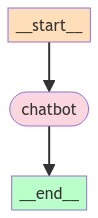

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [10]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

ConnectionError: HTTPConnectionPool(host='localhost', port=11434): Max retries exceeded with url: /api/chat (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x740312e3eda0>: Failed to establish a new connection: [Errno 111] Connection refused'))